Geyu Weng
11/17/2023

In [ ]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

## 0- Load the *S. cerevisiae* WT-model from repository

In [ ]:
#Load the model from the github repository
#https://github.com/SysBioChalmers/yeast-GEM/blob/main/model/yeast-GEM.xml
path_to_model = '/Users/wgy/Downloads/Systems Biology Internship - Technical Challenge/yeast-GEM-8.7.1/model/yeast-GEM.xml'
model = cobra.io.read_sbml_model(path_to_model)

# 1- Create and add a reaction for Limonene production

A Program Lead just had a positive discussion with a future client and wants to know if we can produce limonene in the yeast *Saccharomyces cerevisiae* and leverage the genetic tools that are available at Ginkgo for this organism. They got this information from the following [paper](https://doi.org/10.1186/s13068-019-1580-y) and are really excited about the opportunity.

<center><img src="Images/Biosynthesis-pathway-for-limonene-production-in-plants-and-the-yeast-Y-lipolytica.png" width=800 height=800 /></center>

## Tasks

1. Identify and list the reactions and metabolites necessary for limonene production in yeast following the BiGG nomenclature (hint: limonene already exists in [BiGG](http://bigg.ucsd.edu/universal/metabolites/limnen))
2. Add the reactions to the model

In [ ]:
# 1. limonene is biosynthesized from the precursor geranyl diphosphate (GPP) by enzymatic biotransformation with d- or l-limonene synthetase
# 2. yeasts rely on the mevalonate (MVA) pathway to produce GPP from acetyl-CoA

#You will want to initiate the pathway from geranyl diphosphate, which is already in the model under the id s_0745_c
for m in model.metabolites:
    if 'geranyl diphosphate' in m.name:
        print(m.id, m.name)
    elif 'mevalonate' in m.name:
        print(m.id, m.name)
    elif 'acetyl-CoA' in m.name:
        print(m.id, m.name)

for r in model.reactions:
    if 'mevalonate' in r.name:
        print(r.id, r.name)

print('limonene synthetase \nlimonene')

#You can query other metabolites from the ATLAS website: https://metabolicatlas.org/explore/Yeast-GEM/gem-browser/metabolite/s_0434


s_0028 (R)-mevalonate
s_0029 (R)-mevalonate
s_0189 geranylgeranyl diphosphate
s_0367 acetoacetyl-CoA
s_0370 acetoacetyl-CoA
s_0373 acetyl-CoA
s_0376 acetyl-CoA
s_0377 acetyl-CoA
s_0378 acetyl-CoA
s_0745 geranyl diphosphate
s_0746 geranylgeranyl diphosphate
s_2914 acetoacetyl-CoA
r_0735 mevalonate kinase (atp)
r_0736 mevalonate kinase (ctp)
r_0737 mevalonate kinase (gtp)
r_0738 mevalonate kinase (UTP)
r_0739 mevalonate pyrophoshate decarboxylase
r_0904 phosphomevalonate kinase
r_1096 (R)-mevalonate transport
r_1547 (R)-mevalonate exchange
limonene synthetase 
limonene


In [ ]:
# Create the metabolites, reactions, etc.

from cobra import Reaction, Metabolite

reaction = Reaction('limnen_syn')
reaction.name = 'limonene synthetase'

limnen_c = Metabolite(
    'limnen_c',
    formula='C10H16',
    name='limonene',
    compartment='c')
GPP = model.metabolites.get_by_id("s_0745")

reaction.add_metabolites({
    GPP: -1.0,
    limnen_c: 1.0
})

reaction.reaction
model.add_reactions([reaction])
model.reactions.get_by_id("limnen_syn")


Reaction identifier,limnen_syn
Name,limonene synthetase
Memory address,0x17a15c800
Stoichiometry,s_0745 --> limnen_c geranyl diphosphate --> limonene
GPR,
Lower bound,0.0
Upper bound,1000.0


### Tasks
1. Create a transport from cytoplasm to extracellular compartment for limonene
2. Create an exchange reaction for extracellular limonene
3. Maximize production of limonene (maximize the extracellular exchange reaction)
4. Display the solution summary

In [ ]:
#1- Create transport reaction for limonene

transport = Reaction('limnen_tr')
transport.name = 'limonene transport'

limnen_e = Metabolite(
    'limnen_e',
    formula='C10H16',
    name='limonene',
    compartment='e')

transport.add_metabolites({
    limnen_c: -1.0,
    limnen_e: 1.0
})

transport.reaction
model.add_reactions([transport])
model.reactions.get_by_id("limnen_tr")


Reaction identifier,limnen_tr
Name,limonene transport
Memory address,0x17a15f290
Stoichiometry,limnen_c --> limnen_e limonene --> limonene
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
#2- Create an exchange reaction for extracellular limonene
model.add_boundary(model.metabolites.get_by_id("limnen_e"), type="exchange")

# An exchange reaction is a reversible reaction that adds to or removes an extracellular metabolite from the extracellular compartment.

Reaction identifier,EX_limnen_e
Name,limonene exchange
Memory address,0x17a15e1b0
Stoichiometry,limnen_e <=> limonene <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
#3- Change the model's objective to the exchange reaction you just created
model.objective = 'EX_limnen_e'


In [ ]:
#4- Display the solution summary
model.optimize()
model.summary()


Metabolite,Reaction,Flux,C-Number,C-Flux
s_0565,r_1714,1,6,100.00%
s_0796,r_1832,0.6869,0,0.00%
s_1277,r_1992,1.192,0,0.00%
s_1324,r_2005,1.374,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
limnen_e,EX_limnen_e,-0.3434,10,57.24%
s_0458,r_1672,-2.566,1,42.76%
s_0805,r_2100,-3.939,0,0.00%
s_4157,r_4527,-0.3434,0,0.00%


# 3- Visualize the solution

### Tasks

1. Using your library of choice (Matplotlib, Seaborn, etc.), display the results of flux variability analysis
2. Represent the flux from glucose to product on an Escher map

Reaction ID Reaction Name
EX_limnen_e limonene exchange
limnen_syn limonene synthetase
limnen_tr limonene transport
r_0001 (R)-lactate:ferricytochrome-c 2-oxidoreductase
r_0002 (R)-lactate:ferricytochrome-c 2-oxidoreductase
r_0003 (R,R)-butanediol dehydrogenase
r_0004 (S)-lactate:ferricytochrome-c 2-oxidoreductase
r_0005 1,3-beta-glucan synthase
r_0006 1,6-beta-glucan synthase
r_0007 1-(5-phosphoribosyl)-5-[(5-phosphoribosylamino)methylideneamino)imidazole-4-carboxamide isomerase
r_0012 1-pyrroline-5-carboxylate dehydrogenase
r_0013 2,3-diketo-5-methylthio-1-phosphopentane degradation reaction
r_0014 2,5-diamino-6-ribitylamino-4(3H)-pyrimidinone 5'-phosphate deaminase
r_0015 2,5-diamino-6-ribosylamino-4(3H)-pyrimidinone 5'-phosphate reductase (NADPH)
r_0016 2-aceto-2-hydroxybutanoate synthase
r_0017 2-amino-4-hydroxy-6-hydroxymethyldihydropteridine diphosphokinase
r_0018 2-aminoadipate transaminase
r_0019 2-dehydropantoate 2-reductase
r_0020 2-deoxy-D-arabino-heptulosonate 7-phosphate 

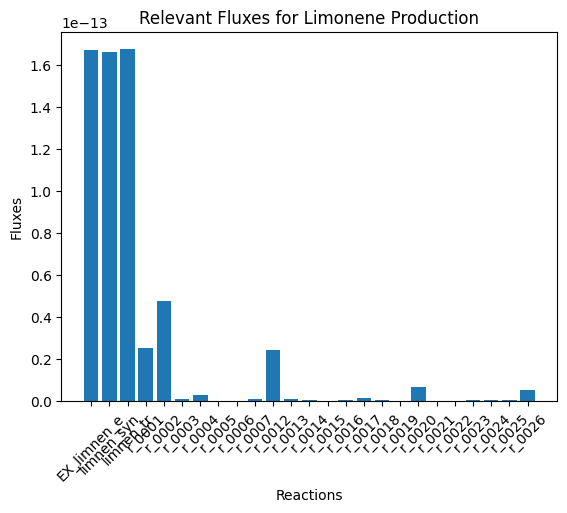

In [ ]:
# 1- Using your library of choice (Matplotlib, Seaborn, etc.), display the results of flux variability analysis
# Flux variability analysis can be run using cobrapy: https://cobrapy.readthedocs.io/en/latest/simulating.html
# Represent your results as a bar chart, presenting the 25 most relevant fluxes

# from cobra.flux_analysis import flux_variability_analysis
# fva = flux_variability_analysis(model, model.reactions)
flux = abs(fva['maximum']-fva['minimum'].sort_values(ascending=False))
plt.bar(flux.index[:25],flux[:25])
plt.xticks(rotation=45)
plt.xlabel('Reactions')
plt.ylabel('Fluxes')
plt.title('Relevant Fluxes for Limonene Production')
print('Reaction ID', 'Reaction Name')
for i in range(25):
    print(flux.index[i], model.reactions.get_by_id(flux.index[i]).name)


In [ ]:
# 2- Represent the flux from glucose to product on an Escher map
# Escher can be used in the jupyter notebook directly: https://escher.readthedocs.io/en/latest/escher-python.html
# Hint: watch this video to get the basic functionality for creating an Escher map: https://escher.readthedocs.io/en/latest/
# Second hint: use the map and json model provided as starting point

# !pip install escher

import escher
from escher import Builder
from time import sleep
import json

from cobra.io import save_json_model
save_json_model(model, "limonene_model.json")

flux_dictionary = flux.to_dict()
with open('flux.json', 'w') as f:
    json.dump(flux_dictionary, f)


In [ ]:
builder = Builder(
    map_json='limonene_map.json'
)
builder

Builder()

# 3A (Optional)

Are there anything you can say about the solution? How could we engineer this strain to become a better producer of limonene?

Include your thoughts/rationale here.

In the paper, the authors overexpressed ten genes involved in the MVA pathway to identify the key enzymes for improving the yields of limonene and discovered that the Hydroxymethylglutaryl-CoA reductase (HMGR)-overexpressed strains, Po1g KdHR and Po1g KlHR achieved the highest titers.
To improve the solution, we could increase the reaction bounds of HMGR and thus increase limonene synthesis.


r_0558 hydroxymethylglutaryl CoA reductase
r_0559 hydroxymethylglutaryl CoA synthase
r_0560 hydroxymethylglutaryl CoA synthase
r_1840 hydroxymethylglutaryl-CoA transport
Reaction ID Reaction Name
EX_limnen_e limonene exchange
limnen_syn limonene synthetase
limnen_tr limonene transport
r_0001 (R)-lactate:ferricytochrome-c 2-oxidoreductase
r_0002 (R)-lactate:ferricytochrome-c 2-oxidoreductase
r_0003 (R,R)-butanediol dehydrogenase
r_0004 (S)-lactate:ferricytochrome-c 2-oxidoreductase
r_0005 1,3-beta-glucan synthase
r_0006 1,6-beta-glucan synthase
r_0007 1-(5-phosphoribosyl)-5-[(5-phosphoribosylamino)methylideneamino)imidazole-4-carboxamide isomerase
r_0012 1-pyrroline-5-carboxylate dehydrogenase
r_0013 2,3-diketo-5-methylthio-1-phosphopentane degradation reaction
r_0014 2,5-diamino-6-ribitylamino-4(3H)-pyrimidinone 5'-phosphate deaminase
r_0015 2,5-diamino-6-ribosylamino-4(3H)-pyrimidinone 5'-phosphate reductase (NADPH)
r_0016 2-aceto-2-hydroxybutanoate synthase
r_0017 2-amino-4-hydroxy-6

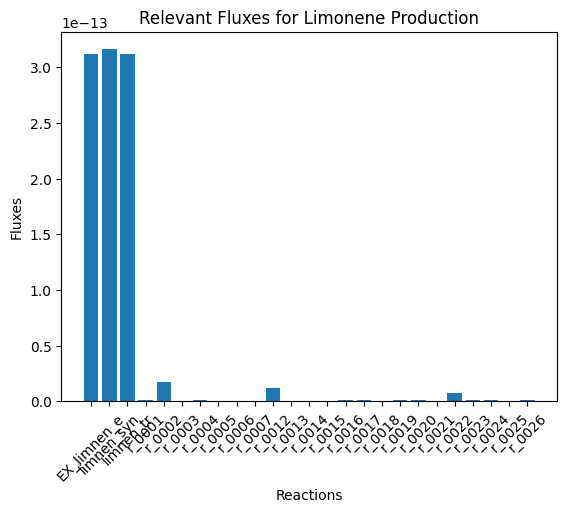

In [ ]:
#Perform any relevant computational predictions here and plot the results you obtain

for r in model.reactions:
    if 'hydroxymethylglutaryl' in r.name:
        print(r.id, r.name)

model.reactions.get_by_id("r_0558").bounds = (0, 2000)
model.reactions.get_by_id("r_1840").bounds = (0, 2000)

fva = flux_variability_analysis(model, model.reactions)
flux = abs(fva['maximum']-fva['minimum'].sort_values(ascending=False))
plt.bar(flux.index[:25],flux[:25])
plt.xticks(rotation=45)
plt.xlabel('Reactions')
plt.ylabel('Fluxes')
plt.title('Relevant Fluxes for Limonene Production')
print('Reaction ID', 'Reaction Name')
for i in range(25):
    print(flux.index[i], model.reactions.get_by_id(flux.index[i]).name)

# The result demonstrates that increaseing HMGR increases the flux of limonene production.